La fusión/unión de DataFrames consiste en crear un nuevo DataFrame a partir de dos DataFrames, lo que nos permite integrar información de diferentes fuentes en una sola, de esta manera podemos realizar un análisis más integral.

Pandas provee tres funciones para está tarea: **merge(), concat(), join()**

In [1]:
import pandas as pd

In [9]:
# Crear DatFrame de ejemplo
df1 = pd.DataFrame({
    'key': ['A', 'B', 'C'],
    'Value1': [1, 2, 3]
})

df2 = pd.DataFrame({
    'key': ['B', 'C', 'D'],
    'Value2': [4, 5, 6]
})

In [10]:
# Imprimo df1
df1

,key,Value1
0,A,1
1,B,2
2,C,3


In [11]:
# Imprimo df2
df2

,key,Value2
0,B,4
1,C,5
2,D,6


1. **merge()**

Permite la unión de dos DataFrames a partir de una columna especifica, los valores de esta columna deben coincidir en ambos DF.

Parámetros:

- **left**: DataFrame que esta estará la izquierda.
- **right**: DataFrame que esta estará la derecha.
- **how**: Cómo será la union entre los DF.
    - **inner**: Intersección entre los dos DataFrames.
    - **outer**: Lo opuesto a la intersección, solo los elementos que no estén en ambos DataFrames.
    - **left**: Regresa todos los elementos del DataFrame de la izquierda (incluyendo la intersección).
    - **right**: Regresa todos los elementos del DataFrame de la derecha (incluyendo la intersección).
**on**: Nombre de la columna a partir del cual se realizará el merge.

In [12]:
inner_merged = pd.merge(df1, df2, on='key', how='inner')
inner_merged

,key,Value1,Value2
0,B,2,4
1,C,3,5


In [13]:
outer_merged = pd.merge(df1, df2, on='key', how='outer')
outer_merged

,key,Value1,Value2
0,A,1.0,NaN
1,B,2.0,4.0
2,C,3.0,5.0
3,D,NaN,6.0


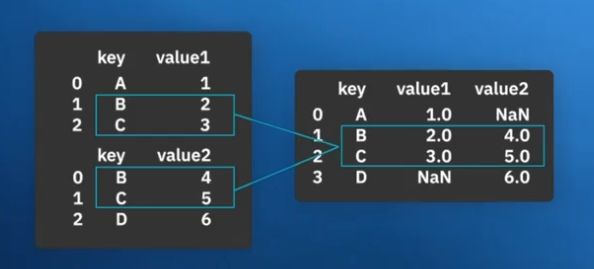

In [14]:
left_merge = pd.merge(df1, df1, on='key', how='left')
left_merge

,key,Value1_x,Value1_y
0,A,1,1
1,B,2,2
2,C,3,3


In [15]:
right_merge = pd.merge(df1, df1, on='key', how='right')
right_merge

,key,Value1_x,Value1_y
0,A,1,1
1,B,2,2
2,C,3,3


----

2. **concat()**

Esta función también nos permite unir DataFrames, con las diferencias de que podemos incluir más de dos DF y podemos seleccionar la orientación de la unión (horizontal ó vertical).

Parámetros:

- **objs**: Lista con los DataFrames.
- **axis**: Orientación, 0 = vertical/filas (default), 1 = horizontal/columnas
- **join**: Tipo de concatenación, inner o outer.

In [18]:
# Crear DatFrame de ejemplo
df3 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']
})

df4 = pd.DataFrame({
    'A': ['A3', 'A4', 'A5'],
    'B': ['B3', 'B4', 'B5']
})

print(df3)
print(df4)

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
    A   B
0  A3  B3
1  A4  B4
2  A5  B5


In [19]:
# Concatenación vertical
vertical_concat = pd.concat([df3, df4])
vertical_concat

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
0,A3,B3
1,A4,B4
2,A5,B5


In [20]:
# Concatenación horizontal (hay que aclarar el axis)
horizontal_concat = pd.concat([df3, df4], axis=1)
horizontal_concat

,A,B,A,B
0,A0,B0,A3,B3
1,A1,B1,A4,B4
2,A2,B2,A5,B5


----

3. **join()**

Permite la unión de dos DataFrames a partir de los indices de ambos DF, ésta función se utiliza a partir del propio DataFrame.

Parámetros:

- **other**: DataFrame que queremos unir
- **on**: Default es el índice del DF.
- **how**: Cómo será la union entre los DF.
    - **inner**: Intersección entre los dos DataFrames.
    - **outer**: Lo opuesto a la intersección, solo los elementos que no estén en ambos DataFrames.
    - **left**: Regresa todos los elementos del DataFrame de la izquierda (incluyendo la intersección).
    - **right**: Regresa todos los elementos del DataFrame de la derecha (incluyendo la intersección).



In [25]:
# Crear DatFrame de ejemplo
df5 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']
}, index=['K0', 'K1', 'K2'])

df6 = pd.DataFrame({
    'C': ['C0', 'C1', 'C2'],
    'D': ['D0', 'D1', 'D2']
}, index=['K0', 'K2', 'K3'])

print(df5)
print(df6)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C1  D1
K3  C2  D2


In [26]:
joined = df5.join(df6, how='inner')
joined


,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C1,D1
